Initial data download

In [ ]:
# Added the Kaggle token(json generated from my kaggle account), to a folder called 'kaggle' in my docs.
!pip install kaggle


In [ ]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download -d kazanova/sentiment140

 94% 76.0M/80.9M [00:00<00:00, 92.6MB/s]
100% 80.9M/80.9M [00:00<00:00, 89.9MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('sentiment140.zip', 'r')
zip_ref.extractall()
zip_ref.close()

# Data Load and Data cleaning

In [ ]:
import numpy as np
import random
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px




In [ ]:
# Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from nltk.tokenize import word_tokenize

# Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

filename = "kaggle/training.1600000.processed.noemoticon.csv"
print(filename)
df1 = pd.read_csv(filename, header=None,engine='python',encoding='latin1')

kaggle/training.1600000.processed.noemoticon.csv


In [ ]:

df1.head()
df1.columns=['Sentiment','Id','Date','Query','User','Text']
df1

,Sentiment,Id,Date,Query,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
df1["Sentiment"].value_counts()
df1["Date"].max()

print(df1.shape)

# df1["Review_Length"] = df1["Text"].str.len()
df1

(1600000, 6)


,Sentiment,Id,Date,Query,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
import re
print(re.findall(r'@[A-Za-z0-9]+',df1.loc[0]['Text']))
print(df1.loc[0]['Text'])

['@switchfoot']
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


In [ ]:
# new_col_val1 = []
# new_col_val2 = []
# for texts in df1['Text']:
#   uns = re.findall(r'@[A-Za-z0-9]+',texts)
#   new_col_val1.append(uns)
#   new_col_val2.append(len(uns))



df1['username_in_tweets'] = df1['Text'].apply(lambda x : re.findall(r'@[A-Za-z0-9]+',x))
df1['total_usernames_used'] = df1['username_in_tweets'].str.len()
df1

,Sentiment,Id,Date,Query,User,Text,username_in_tweets,total_usernames_used
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",[@switchfoot],1
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,[],0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,[@Kenichan],1
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,[],0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",[@nationwideclass],1
...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,[],0
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,[],0
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,[],0
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,[],0


In [ ]:
df1['Query'].value_counts()

NO_QUERY    1600000
Name: Query, dtype: int64

In [ ]:
print(f' The Review length varies from {df1["Review_Length"].min()} to {df1["Review_Length"].max()}')
print(f'Values of the Sentiments :')
print(f'{df1["Sentiment"].value_counts()}')

KeyError: ignored

In [ ]:
df1["Orig_Text"] = df1["Text"]
df1.head()


,Sentiment,Id,Date,Query,User,Text,username_in_tweets,total_usernames_used,Orig_Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",[@switchfoot],1,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,[],0,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,[@Kenichan],1,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,[],0,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",[@nationwideclass],1,"@nationwideclass no, it's not behaving at all...."


In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
len(stopwords)

nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Cleaning the texts
import string
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

def tokenization(text):
    text = re.split('\W+', text)
    return text

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

# df1['Orig_Text'] = df1['Text']
# df1['Orig_Text'] = df1['Orig_Text'].apply(lambda x: remove_punct(x))
# df1.head(10)

def clean_text(tweet):
    tweet=re.sub(r'@[A-Za-z0-9]+'," ",tweet) ##Removing the usernames
    # tweet=re.sub(r'^[A-Za-z0-9.!?]+'," ",tweet) ##Removing digits and punctuations
    tweet=re.sub(r'https?://[A-Za-z0-9./]+'," ",tweet) ## removing links
    tweet = remove_punct(tweet)
    tweet = tokenization(tweet)
    tweet = remove_stopwords(tweet)
    tweet = stemming(tweet)
    tweet = lemmatizer(tweet)
    tweet = ' '.join(tweet)
    return tweet


# countVectorizer = CountVectorizer(analyzer=clean_text)
# countVector = countVectorizer.fit_transform(df1['Text'])



In [ ]:
df1['Text'] = [clean_text(tweet) for tweet in df1['Text']]
df1

,Sentiment,Id,Date,Query,User,Text,username_in_tweets,total_usernames_used,Orig_Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww that bummer you shoulda got david carr t...,[@switchfoot],1,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant updat facebook text might cri resul...,[],0,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,i dive mani time ball manag save the rest go ...,[@Kenichan],1,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole bodi feel itchi like fire,[],0,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behav im mad i cant see,[@nationwideclass],1,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke have school best feel ever,[],0,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdbcom veri cool hear old walt interview â ...,[],0,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are readi mojo makeov ask detail,[],0,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happi th birthday boo alll time tupac amaru sh...,[],0,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
# print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))


1600000 Number of tweets has 376335 words


In [ ]:
df1.head()

,Sentiment,Id,Date,Query,User,Text,Review_Length,username_in_tweets,total_usernames_used,Orig_Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"[, awww, that, bummer, you, shoulda, got, davi...",115,[@switchfoot],1,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,"[upset, cant, updat, facebook, text, might, cr...",111,[],0,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,"[, i, dive, mani, time, ball, manag, save, the...",89,[@Kenichan],1,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,"[whole, bodi, feel, itchi, like, fire, ]",47,[],0,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"[, behav, im, mad, i, cant, see, ]",111,[@nationwideclass],1,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# get how many # included?
# df1["Text"].duplicated().sum()


In [ ]:
df1["Sentiment"].value_counts()

0    800000
4    800000
Name: Sentiment, dtype: int64

In [ ]:
print(len(df1["Text"][0].split()))
df1["Text"][0]
df1["Text"][0].split().count()

11


TypeError: ignored

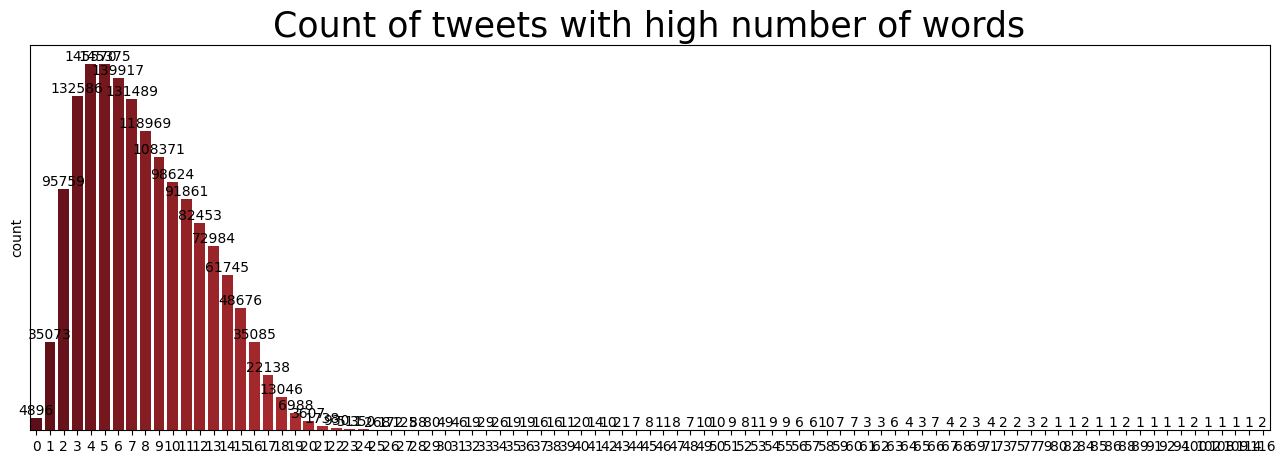

In [ ]:
df1["Review_Length"] = df1["Text"].apply(lambda x : len(x.split()))

# Count of tweets wrt the number of words
plt.figure(figsize=(16,5))
ax = sns.countplot(x='Review_Length', data=df1[(df1['Review_Length']<=1000)  ], palette='Reds_r')
plt.title('Count of tweets with high number of words', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
# Checking the outliers

# df1[df1['Review_Length'].quantile(0.995)]

df2 = df1[df1["Review_Length"]< df1["Review_Length"].quantile(0.995)]

df1.shape[0] - df2.shape[0]

8395

In [ ]:
df2 = df2[~(df2["Review_Length"] == 0)]
df2.shape

In [ ]:
print(df2["Review_Length"].max())

print(df1["Review_Length"].max())

display(df2.head())


19
116


,Sentiment,Id,Date,Query,User,Text,username_in_tweets,total_usernames_used,Orig_Text,Review_Length
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww that bummer you shoulda got david carr t...,[@switchfoot],1,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",11
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant updat facebook text might cri resul...,[],0,is upset that he can't update his Facebook by ...,12
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,i dive mani time ball manag save the rest go ...,[@Kenichan],1,@Kenichan I dived many times for the ball. Man...,11
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole bodi feel itchi like fire,[],0,my whole body feels itchy and like its on fire,6
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behav im mad i cant see,[@nationwideclass],1,"@nationwideclass no, it's not behaving at all....",6


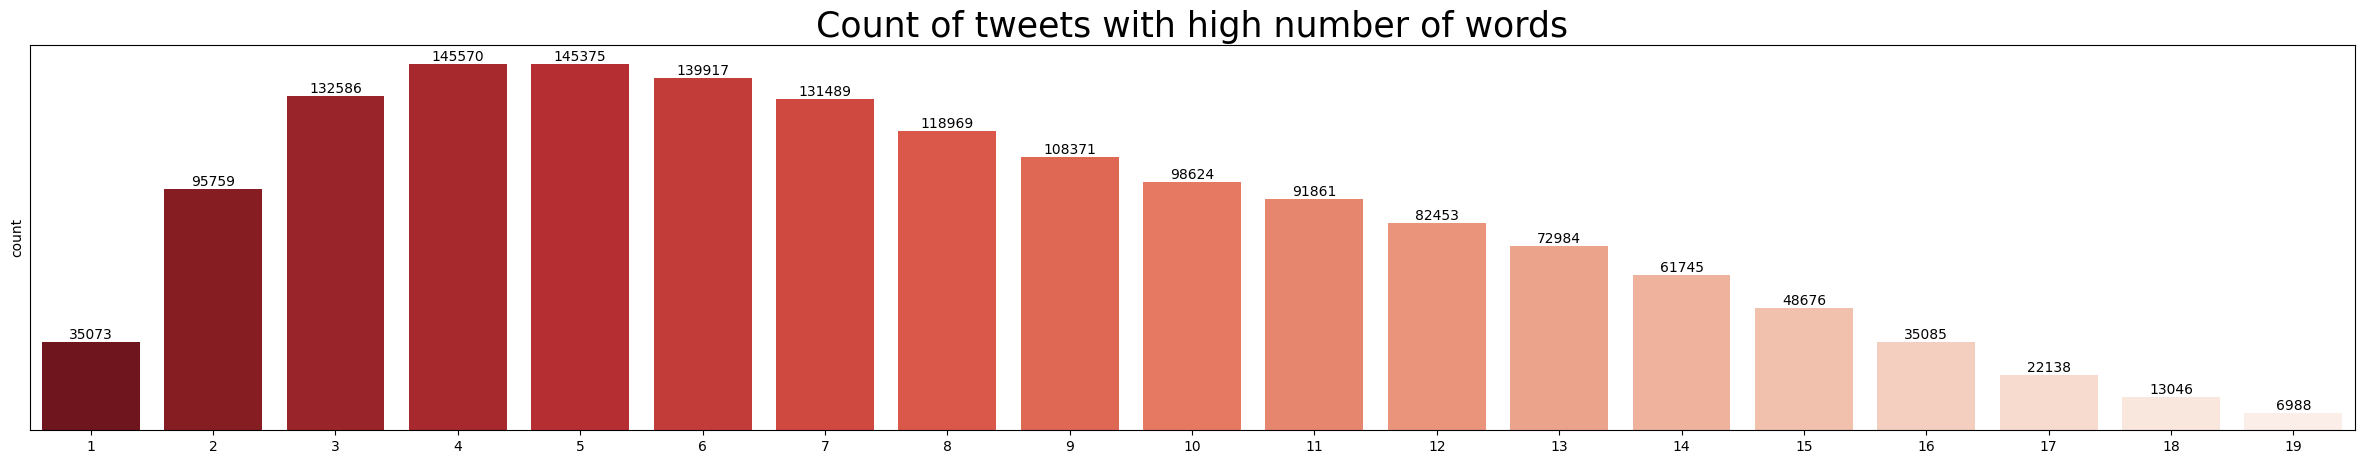

In [ ]:

# Count of tweets wrt the number of words
plt.figure(figsize=(30,5))
ax = sns.countplot(x='Review_Length', data=df2, palette='Reds_r')
plt.title('Count of tweets with high number of words', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()


# df1["Review_Length"].quantile(0.995)

In [ ]:
df2.drop_duplicates("Text", inplace=True)
# Finally the cleaned texts/tweets
df2.shape

(1497722, 10)

In [ ]:
df2.Sentiment.value_counts()

0    755553
4    742169
Name: Sentiment, dtype: int64

# Train Test Validation Split

In [ ]:
df2.loc[df2["Sentiment"]==4, "Sentiment"]=1
df2

,Sentiment,Id,Date,Query,User,Text,username_in_tweets,total_usernames_used,Orig_Text,Review_Length
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww that bummer you shoulda got david carr t...,[@switchfoot],1,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",11
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant updat facebook text might cri resul...,[],0,is upset that he can't update his Facebook by ...,12
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,i dive mani time ball manag save the rest go ...,[@Kenichan],1,@Kenichan I dived many times for the ball. Man...,11
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole bodi feel itchi like fire,[],0,my whole body feels itchy and like its on fire,6
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behav im mad i cant see,[@nationwideclass],1,"@nationwideclass no, it's not behaving at all....",6
...,...,...,...,...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke have school best feel ever,[],0,Just woke up. Having no school is the best fee...,7
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdbcom veri cool hear old walt interview â ...,[],0,TheWDB.com - Very cool to hear old Walt interv...,9
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are readi mojo makeov ask detail,[],0,Are you ready for your MoJo Makeover? Ask me f...,6
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happi th birthday boo alll time tupac amaru sh...,[],0,Happy 38th Birthday to my boo of alll time!!! ...,9


In [ ]:

X = df2["Text"]
y = df2["Sentiment"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

print(f"Training set shape :{X_train.shape} \t Test set shape : {X_test.shape}")

Training set shape :(1198177,) 	 Test set shape : (299545,)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)


print(f"Training set shape :{X_train.shape} \t Test set shape : {X_test.shape} \t Validation set shape : {X_valid.shape}")

Training set shape :(958541,) 	 Test set shape : (299545,) 	 Validation set shape : (239636,)


In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[     0, 483553],
       [     1, 474988]])

# Algorithm : Naive Bayes

In [ ]:
clf = CountVectorizer()
X_train_cv = clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)

tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tf, y_train)

nb_pred = nb_clf.predict(X_test_tf)

print('Classification Report for Naive Bayes:\n',classification_report(y_test, nb_pred, target_names=["Negatives","Positive"]))

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

   Negatives       0.75      0.78      0.76    151111
    Positive       0.76      0.73      0.75    148434

    accuracy                           0.76    299545
   macro avg       0.76      0.75      0.75    299545
weighted avg       0.76      0.76      0.75    299545



# Algorithm : XG Boost

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_tf, y_train)
xgb_pred = xgb_clf.predict(X_test_tf)

print('Classification Report for XG Boost:\n',classification_report(y_test, xgb_pred, target_names=["Negatives","Positive"]))

Classification Report for XG Boost:
               precision    recall  f1-score   support

   Negatives       0.79      0.68      0.73    151111
    Positive       0.71      0.81      0.76    148434

    accuracy                           0.75    299545
   macro avg       0.75      0.75      0.75    299545
weighted avg       0.75      0.75      0.74    299545

